# Import dependencies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import json

from config import g_key


# Import CSV
Import csv and selected only required columns 

In [2]:
df= pd.read_csv("Resources/Data_Clean_Cases.csv")
# df = df[['location','people_vaccinated_per_hundred',
#        'people_fully_vaccinated_per_hundred',
#         'stringency_index','new_cases','new_cases_per_million']]


# Change country name
Country name for the geojson_layer is different from the one in the CSV.
Change the name in the df to match the geojson_layer

In [3]:
change_from = ['Bahamas',
               "Cote d'Ivoire",
               'Democratic Republic of Congo',
               'Congo',
               'Czechia',
               'Guinea-Bissau',
               'North Macedonia',
               'Serbia',
               'Timor',
               'Tanzania',
               'United States']

change_to = ['The Bahamas',
             'Ivory Coast',
             'Democratic Republic of the Congo',
             'Republic of the Congo',
             'Czech Republic',
             'Guinea Bissau',
             'Macedonia',
             'Republic of Serbia',
             'East Timor',
             'United Republic of Tanzania',
             'United States of America']

for index, row in df.iterrows():
    try:
        x = change_from.index(row['location'])
        df.loc[row.name,['location']] = change_to[x]
    except:
        x=0


In [4]:
# Access maps with unique API key
gmaps.configure(api_key=g_key)

# Customize the size of the figure
figure_layout = {
    'width': '700px',
    'height': '1000px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'}
fig = gmaps.figure(layout=figure_layout)

In [5]:
# Get a library of coordinates data to define country borders
countries_string = requests.get(
    "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
).content
countries = json.loads(countries_string)

# Create a list of countries captured in the geojson layer
country_list = []
for x in range(0,len(countries['features'])):
    country_list.append(countries['features'][x]['properties']['name'])


In [6]:
df_max = df.groupby('location').max().reset_index()
df_sum = df.groupby('location').sum().reset_index()

C:\Users\walto\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  """Entry point for launching an IPython kernel.


In [7]:
#append info list to match country_list

def prep_plot (df,info):
    
    locations = df['location'].values.tolist()
    plotinfo = df[info].values.tolist()
    
    info=[]
    
    for country in country_list:
        try:
            locations.index(country)>=0
            z = locations.index(country)
            info.append(plotinfo[z])
        except:
            info.append(0)




# People fully Vaccinated per 100
### Defined as total number of people who received all doses prescribed by the vaccination protocol per 100 people in the total population
- The more opaque the colour the more fully vaccinated people per 100 is in the country

In [8]:
# Get plot information to a range from 0 to 1 
df_max['people_fully_vaccinated_per_hundred_plot']=df_max['people_fully_vaccinated_per_hundred']/100


locations = df_max['location'].values.tolist()
plotinfo = df_max['people_fully_vaccinated_per_hundred_plot'].values.tolist()
    
info=[]
    
for country in country_list:
    try:
        locations.index(country)>=0
        z = locations.index(country)
        info.append(plotinfo[z])
    except:
        info.append(0)

fig = gmaps.figure()
geojson = gmaps.geojson_layer(countries,fill_color='red', fill_opacity=info)
fig.add_layer(geojson)
fig


Figure(layout=FigureLayout(height='420px'))

# GDP Distribution

In [9]:
# Get plot information to a range from 0 to 1 
df_max['gdp_per_capita_percent']=df_max['gdp_per_capita']/df_max['gdp_per_capita'].sum()
df_max['gdp_per_capita_plot'] = df_max['gdp_per_capita_percent']/df_max['gdp_per_capita_percent'].max()

locations = df_max['location'].values.tolist()
plotinfo = df_max['gdp_per_capita_plot'].values.tolist()
    
info=[]
    
for country in country_list:
    try:
        locations.index(country)>=0
        z = locations.index(country)
        info.append(plotinfo[z])
    except:
        info.append(0)

fig = gmaps.figure()
geojson = gmaps.geojson_layer(countries,fill_color='yellow', fill_opacity=info)
fig.add_layer(geojson)
fig

Figure(layout=FigureLayout(height='420px'))

# Total Cases

- The more opaque the colour the higher the case count in the country

In [10]:

df_sum['new_cases_percent'] = df_sum['new_cases']/df_sum['new_cases'].sum()*100
df_sum['new_cases_plot']=df_sum['new_cases_percent']/df_sum['new_cases_percent'].max()

locations = df_sum['location'].values.tolist()
plotinfo = df_sum['new_cases_plot'].values.tolist()
    
info=[]
    
for country in country_list:
    try:
        locations.index(country)>=0
        z = locations.index(country)
        info.append(plotinfo[z])
    except:
        info.append(0)

fig = gmaps.figure()
geojson = gmaps.geojson_layer(countries,fill_color='blue', fill_opacity=info)
fig.add_layer(geojson)
fig

Figure(layout=FigureLayout(height='420px'))

In [11]:

df_sum['new_cases_per_million_percent'] = df_sum['new_cases_per_million']/df_sum['new_cases_per_million'].sum()*100
df_sum['new_cases_per_million_plot']=df_sum['new_cases_per_million_percent']/df_sum['new_cases_per_million_percent'].max()

locations = df_sum['location'].values.tolist()
plotinfo = df_sum['new_cases_per_million_plot'].values.tolist()
    
info=[]
    
for country in country_list:
    try:
        locations.index(country)>=0
        z = locations.index(country)
        info.append(plotinfo[z])
    except:
        info.append(0)

fig = gmaps.figure()
geojson = gmaps.geojson_layer(countries,fill_color='green', fill_opacity=info)
fig.add_layer(geojson)
fig

Figure(layout=FigureLayout(height='420px'))

In [12]:

df_sum['new_deaths_per_million_percent'] = df_sum['new_deaths_per_million']/df_sum['new_deaths_per_million'].sum()*100
df_sum['new_deaths_per_million_plot']=df_sum['new_deaths_per_million_percent']/df_sum['new_deaths_per_million_percent'].max()

locations = df_sum['location'].values.tolist()
plotinfo = df_sum['new_deaths_per_million_plot'].values.tolist()
    
info=[]
    
for country in country_list:
    try:
        locations.index(country)>=0
        z = locations.index(country)
        info.append(plotinfo[z])
    except:
        info.append(0)

fig = gmaps.figure()
geojson = gmaps.geojson_layer(countries,fill_color='black', fill_opacity=info)
fig.add_layer(geojson)
fig

Figure(layout=FigureLayout(height='420px'))

In [13]:

df_sum['new_deaths_percent'] = df_sum['new_deaths']/df_sum['new_deaths'].sum()*100
df_sum['new_deaths_plot']=df_sum['new_deaths_percent']/df_sum['new_deaths_percent'].max()

locations = df_sum['location'].values.tolist()
plotinfo = df_sum['new_deaths_plot'].values.tolist()
    
info=[]
    
for country in country_list:
    try:
        locations.index(country)>=0
        z = locations.index(country)
        info.append(plotinfo[z])
    except:
        info.append(0)

fig = gmaps.figure()
geojson = gmaps.geojson_layer(countries,fill_color='purple', fill_opacity=info)
fig.add_layer(geojson)
fig

Figure(layout=FigureLayout(height='420px'))

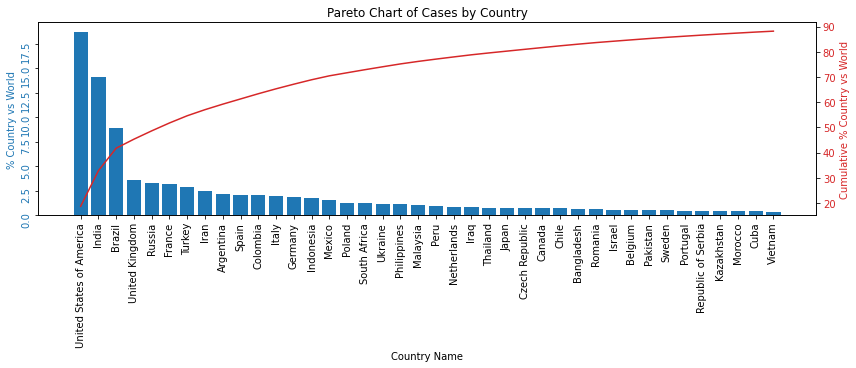

80% of the world's cases are in 34 countries out of the 186 countries analysed
20% of the countries with the highest cases count accounts for 87.47% of cases


In [14]:
plt_df = pd.DataFrame({'country':locations,
                        'new_cases_percent':df_sum['new_cases_percent'].values.tolist()
                        })

plt_df = plt_df.sort_values('new_cases_percent', ascending =False).reset_index()
plt_df.pop('index')
plt_df

plt_df ['cumulative %']="" 
cumulative = 0
rownum = 0

for index, row in plt_df.iterrows():
    cumulative = cumulative + (row ['new_cases_percent'])
    plt_df.loc[rownum,'cumulative %'] = cumulative
    plt_df.loc[rownum,'new_cases_percent'] = row['new_cases_percent']
    rownum = rownum + 1

country20 = round(plt_df.loc[int(0.2*len(plt_df['country']))]['cumulative %'],2) 
plt_df = plt_df.head(40)

fig, ax1 = plt.subplots(figsize = (12,5))

color = 'tab:blue'
ax1.set_xlabel('Country Name')
ax1.tick_params(rotation = 90)
ax1.set_ylabel('% Country vs World', color=color)
ax1.bar(plt_df['country'], plt_df['new_cases_percent'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Cumulative % Country vs World', color=color)  # we already handled the x-label with ax1
ax2.plot(plt_df['country'],plt_df['cumulative %'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.title('Pareto Chart of Cases by Country')
plt.show()


print(f"80% of the world's cases are in 23 countries out of the 186 countries analysed")
print(f'20% of the countries with the highest cases count accounts for {country20}% of cases')

In [15]:
plt_df

,country,new_cases_percent,cumulative %
0,United States of America,18.731402,18.731402
1,India,14.136896,32.868298
2,Brazil,8.918708,41.787006
3,United Kingdom,3.574908,45.361914
4,Russia,3.301463,48.663377
5,France,3.128195,51.791572
6,Turkey,2.866895,54.658467
7,Iran,2.411586,57.070053
8,Argentina,2.185515,59.255568
9,Spain,2.068414,61.323982
